# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [82]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
from sklearn.metrics import roc_auc_score
pd.options.display.max_columns = 999

In [83]:
plant = pd.read_csv("data/31.finaldata_plant/plant_wsASOSsky.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,MONTH,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,0,0,0,4,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,1.0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,0,0,0,4,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,1.0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778,4.00,3.00,0,0,0,4,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,1.0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,0,0,0,4,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,2.0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490,5.00,3.00,0,0,0,4,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0,7.5,0.0,345.8,0.4,1011.4,1014.9,40.3,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.778235,4.55,-0.66,0,0,0,3,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,2.3,0.0,283.6,2.1,1020.9,1024.2,60.2,22.3,36600.0,2.0
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.490602,3.79,-1.31,0,0,0,3,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,2.3,0.0,283.6,2.1,1020.9,1024.2,60.2,22.3,36600.0,2.0
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.940403,4.15,-0.03,0,0,0,3,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,1.9,0.0,326.5,2.1,1020.9,1024.2,62.5,22.3,36600.0,2.0
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.232477,4.21,-0.46,0,0,0,3,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0,1.9,0.0,326.5,2.1,1020.9,1024.2,62.5,22.3,36600.0,2.0


## 정규화 할 list 나누기

In [84]:
dummy_list = ["MONTH"]
caling_list= ["AVG_PA", "AVG_PS", "HR1_RN", "AVG_TA", "AVG_WS", "MAX_WS", "MAX_WS_WD", "MAX_INS_WS", "MAX_INS_WS_WD", "WD_N1", "WS_N1", "GUST_WS_N1", "PA", "BUOY_HM", "BUOY_TA", "MAX_WH", "AVG_WH", "LB_WD", "LB_WS", "LB_MAX_INS_WD", "LB_MAX_IWS", "LB_TA", "LB_PS", "LB_HM"]

In [85]:
caling_list.extend(["DEW_POINT_COIL", "IN_OUT_TEM_D", "IN_COIL_TEM_D", "ASOS_RAIN_CUM", "ASOS_TEMP", "ASOS_WIND_DIR", "ASOS_WIND_SPD", "ASOS_PRESS", "ASOS_SEA_PRESS", "ASOS_HUMID", "ASOS_SOLAR_RAD", "ASOS_SUNSHINE", "SKY"])
caling_list

['AVG_PA',
 'AVG_PS',
 'HR1_RN',
 'AVG_TA',
 'AVG_WS',
 'MAX_WS',
 'MAX_WS_WD',
 'MAX_INS_WS',
 'MAX_INS_WS_WD',
 'WD_N1',
 'WS_N1',
 'GUST_WS_N1',
 'PA',
 'BUOY_HM',
 'BUOY_TA',
 'MAX_WH',
 'AVG_WH',
 'LB_WD',
 'LB_WS',
 'LB_MAX_INS_WD',
 'LB_MAX_IWS',
 'LB_TA',
 'LB_PS',
 'LB_HM',
 'DEW_POINT_COIL',
 'IN_OUT_TEM_D',
 'IN_COIL_TEM_D',
 'ASOS_RAIN_CUM',
 'ASOS_TEMP',
 'ASOS_WIND_DIR',
 'ASOS_WIND_SPD',
 'ASOS_PRESS',
 'ASOS_SEA_PRESS',
 'ASOS_HUMID',
 'ASOS_SOLAR_RAD',
 'ASOS_SUNSHINE',
 'SKY']

In [86]:
plant = etl.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE', 'SKY']
dummy_category: ['PLANT', 'LOC', 'MONTH']


,MEA_DDHR,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.191161,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.191161,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.191161,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-0.415669,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-0.415669,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [87]:
plant = plant.drop(['COND_LOC'], axis=1)
plant

,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-1.191161,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-1.191161,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2016-04-01 00:00:00,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,0,0,0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-1.191161,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-0.415669,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2016-04-01 03:00:00,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,0,0,0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.383440,-0.363778,-1.607286,-0.877518,-0.870429,-0.415669,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,0,0,0,-0.736579,-1.012161,-0.617242,-0.825769,-0.467801,0.669890,0.661009,-0.147832,-0.750703,0.582840,0.554794,1.173689,0.754372,1.381086,1.230371,1.384445,1.064359,0.649668,-0.911473,-0.677958,2.099928,-0.278883,0.869325,1.211131,0.935346,1.312324,-0.675995,0.618521,-1.303263,-0.831941,0.644152,-0.655778,-0.185364,-0.852154,0.938951,0.161914,0.718819,0.709988,-0.635240,2.016265,1

## test_data validation & 정규화 preprocessing

In [88]:
test_data = pd.read_csv("data/31.finaldata_plant/test_wsASOSsky.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,IN_OUT_TEM_D,IN_COIL_TEM_D,MONTH,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,ASOS_TEMP,ASOS_RAIN_CUM,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,0,0,0,3.97,-1.93,4,1021.200000,1023.7,0.0,3.150000,2.125000,2.550,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0,2.0,0.0,330.3,1.7,1020.9,1024.2,63.0,22.30,36600.0,1.0
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,0,0,0,3.94,-0.76,4,1021.633333,1024.1,0.0,4.958333,2.791667,3.275,288.208333,5.533333,274.216667,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0,-1.2,0.0,98.1,0.3,1020.4,1023.7,84.7,0.00,0.0,1.0
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,0,0,0,-2.81,0.38,4,1022.066667,1024.5,0.0,6.766667,3.458333,4.000,307.091667,6.816667,265.083333,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0,8.4,0.0,9.3,3.4,1021.8,1025.0,32.1,5.00,12360.0,1.0
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0,0,0,0.00,1.46,4,1022.500000,1024.9,0.0,8.575000,4.125000,4.725,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0,9.2,0.0,355.5,3.2,1021.6,1024.8,25.6,6.18,14160.0,3.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-11.413783,0,0,0,-0.73,2.52,4,1021.100000,1023.5,0.0,8.837500,4.075000,4.775,304.662500,7.850000,279.862500,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0,9.8,0.0,349.8,3.2,1020.8,1024.0,24.9,12.76,22980.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,0,0,0,4.45,-2.57,3,1020.500000,1023.0,0.0,1.450000,1.225000,1.400,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0,-0.8,0.0,47.8,0.5,1019.9,1023.1,79.8,0.00,0.0,2.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,0,0,0,7.76,-2.55,3,1020.700000,1023.2,0.0,0.175000,0.875000,1.225,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0,-1.4,0.0,326.3,0.4,1020.0,1023.2,84.8,0.00,0.0,2.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,0,0,0,2.84,-1.93,3,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,29.0,3.3,338.0,8.0,3.9,1023.9,46.0,-1.6,0.0,59.1,1.5,1020.5,1023.7,90.4,0.05,60.0,2.0
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-3.401824,0,0,0,0.64,1.34,3,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,149.0,0.9,338.0,8.0,7.2,1023.6,49.0,12.2,0.0,307.5,1.1,1019.4,1022.5,36.8,8.33,16260.0,2.0


In [89]:
test = etl.preprosess(test_data,caling_list,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D', 'ASOS_RAIN_CUM', 'ASOS_TEMP', 'ASOS_WIND_DIR', 'ASOS_WIND_SPD', 'ASOS_PRESS', 'ASOS_SEA_PRESS', 'ASOS_HUMID', 'ASOS_SOLAR_RAD', 'ASOS_SUNSHINE', 'SKY']
dummy_category: ['PLANT', 'LOC', 'MONTH']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,0,0,0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,0.598363,-1.476814,-0.243312,-1.100657,1.559953,-0.064784,0.786139,0.804603,-0.488267,1.992612,1.899260,-1.365002,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0,0,0,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,0.586896,-0.764695,-0.243312,-1.439924,-0.404293,-0.977051,0.726684,0.745901,0.545038,-0.837019,-0.818964,-1.365002,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,0,0,0,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-1.993108,-0.070835,-0.243312,-0.422125,-1.155477,1.042967,0.893157,0.898525,-1.959654,-0.202573,0.098994,-1.365002,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,0,0,0,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,-0.919062,0.586506,-0.243312,-0.337308,1.773127,0.912644,0.869375,0.875044,-2.269169,-0.052843,0.232677,0.538364,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,0,0,0,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-1.770558,-1.198084,1.231674,-0.243312,-0.273696,1.724909,0.912644,0.774248,0.781122,-2.302502,0.782088,0.887724,0.538364,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# 데이터 분류

## plant_train 데이터
### train, test 데이터 분리

In [90]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)
plant.head()

,X24H_COND_LOC,X48H_COND_LOC,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,0.0,0.0,0,0,0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.191161,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,0,0,0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.191161,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0,0,0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-1.191161,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0.0,0.0,0,0,0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-0.415669,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.0,0.0,0,0,0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,-0.185364,-0.386845,1.391819,-0.921534,-0.38344,-0.363778,-1.607286,-0.877518,-0.870429,-0.415669,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [91]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train_y = plant[['X24H_COND_LOC', 'X48H_COND_LOC']]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X,train_y, test_size=0.3, shuffle=True, random_state=42, stratify=train_y)

In [93]:
y_train24 = y_train[['X24H_COND_LOC']]
y_train48 = y_train[['X48H_COND_LOC']]
y_val24 = y_val[['X24H_COND_LOC']]
y_val48 = y_val[['X48H_COND_LOC']]

## Random UnderSampling
-- Sampling 변수를 잘 확인해야함

In [94]:
from imblearn.under_sampling import *

In [95]:
rus = RandomUnderSampler(random_state=42)

In [96]:
X_undersampled24, y_undersampled24 = rus.fit_resample(X_train, y_train24)
X_undersampled48, y_undersampled48 = rus.fit_resample(X_train, y_train48)

## test_data 만들기

In [97]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

In [98]:
test_X

,RULL_COND_LOC,RULL_X24H_COND_LOC,RULL_X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,ASOS_RAIN_CUM,ASOS_TEMP,ASOS_WIND_DIR,ASOS_WIND_SPD,ASOS_PRESS,ASOS_SEA_PRESS,ASOS_HUMID,ASOS_SOLAR_RAD,ASOS_SUNSHINE,SKY,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
0,0,0,0,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,0.598363,-1.476814,-0.243312,-1.100657,1.559953,-0.064784,0.786139,0.804603,-0.488267,1.992612,1.899260,-1.365002,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,0.586896,-0.764695,-0.243312,-1.439924,-0.404293,-0.977051,0.726684,0.745901,0.545038,-0.837019,-0.818964,-1.365002,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-1.993108,-0.070835,-0.243312,-0.422125,-1.155477,1.042967,0.893157,0.898525,-1.959654,-0.202573,0.098994,-1.365002,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,-0.919062,0.586506,-0.243312,-0.337308,1.773127,0.912644,0.869375,0.875044,-2.269169,-0.052843,0.232677,0.538364,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-1.770558,-1.198084,1.231674,-0.243312,-0.273696,1.724909,0.912644,0.774248,0.781122,-2.302502,0.782088,0.887724,0.538364,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0,0,0,-0.639614,-1.563968,-0.277684,-0.797087,-0.973308,0.636848,0.646940,-0.201451,-1.165727,-0.605992,-0.887058,0.974582,-0.892155,1.178701,-1.461947,0.720434,0.550731,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,1.386802,-0.015526,1.263465,-0.014602,-0.844050,0.651951,-1.722919,-0.880800,0.781830,-1.866349,-0.243312,-1.397515,-0.829795,-0.846727,0.667230,0.675460,0.311711,-0.837019,-0.818964,-0.413319,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3535,0,0,0,-0.823010,-1.167179,-0.459468,-1.312941,0.436104,0.660368,0.670221,-0.201451,-1.303176,-0.917026,-1.027651,-0.307913,-1.214922,0.036638,-1.535644,0.720434,0.694610,0.630048,-1.830636,-0.796091,-0.446039,-0.16337,-1.677595,-0.269399,1.263465,-0.014602,-0.911930,0.687035,-1.459530,-0.816577,2.046987,-1.854176,-0.243312,-1.461128,1.526116,-0.911889,0.679121,0.687200,0.549800,-0.837019,-0.818964,-0.413319,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3536,0,0,0,-1.060959,-0.733598,-0.762821,-1.010180,-0.38403

# Random Forest
## 24시간 후 결로 예측

### UnderSampling

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under24 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under24.fit(X_undersampled24, y_undersampled24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=10, random_state=42)

In [100]:
y_pred_under24 = rf_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.14      0.97      0.25       594

    accuracy                           0.97    104796
   macro avg       0.57      0.97      0.62    104796
weighted avg       0.99      0.97      0.98    104796



## 변수 중요도

In [101]:
rf_clf_under24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_clf_under24.feature_importances_], columns=['variable', 'importance'])
rf_clf_under24_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under24_df.tail(20)

,variable,importance
0,RULL_COND_LOC,0.00271148
45,PLANT_1,0.0024525
60,MONTH_11,0.00177754
51,MONTH_2,0.00155379
50,MONTH_1,0.00144432
1,RULL_X24H_COND_LOC,0.00120019
59,MONTH_10,0.00112548
61,MONTH_12,0.00112413
52,MONTH_3,0.000841681
48,LOC_2,0.000784285


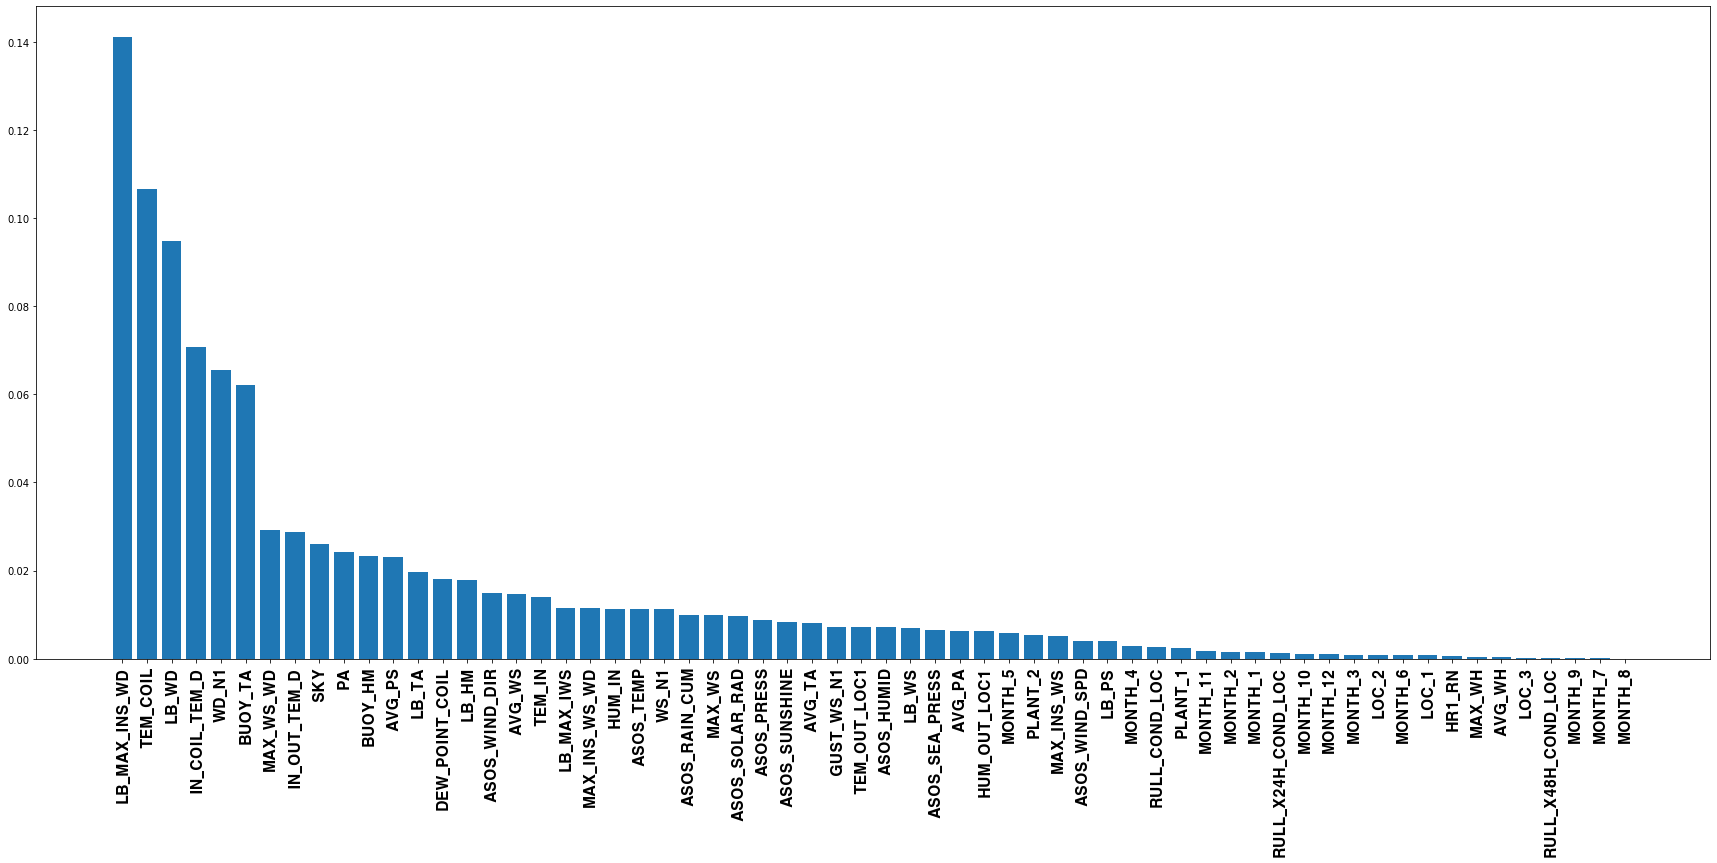

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48시간 결로 예측

### UnderSampling

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_under48 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf_under48.fit(X_undersampled48, y_undersampled48)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=10, random_state=42)

In [104]:
y_pred_under48 = rf_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    104202
         1.0       0.19      0.97      0.32       594

    accuracy                           0.98    104796
   macro avg       0.60      0.97      0.66    104796
weighted avg       1.00      0.98      0.98    104796



## 변수 중요도

In [105]:
rf_clf_under48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_clf_under48.feature_importances_], columns=['variable', 'importance'])
rf_clf_under48_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under48_df.tail(20)

,variable,importance
59,MONTH_10,0.00414886
23,MAX_WH,0.00356157
35,ASOS_RAIN_CUM,0.00354844
51,MONTH_2,0.00301653
45,PLANT_1,0.00286929
46,PLANT_2,0.00253913
49,LOC_3,0.00222811
2,RULL_X48H_COND_LOC,0.00208189
60,MONTH_11,0.00201049
53,MONTH_4,0.00198769


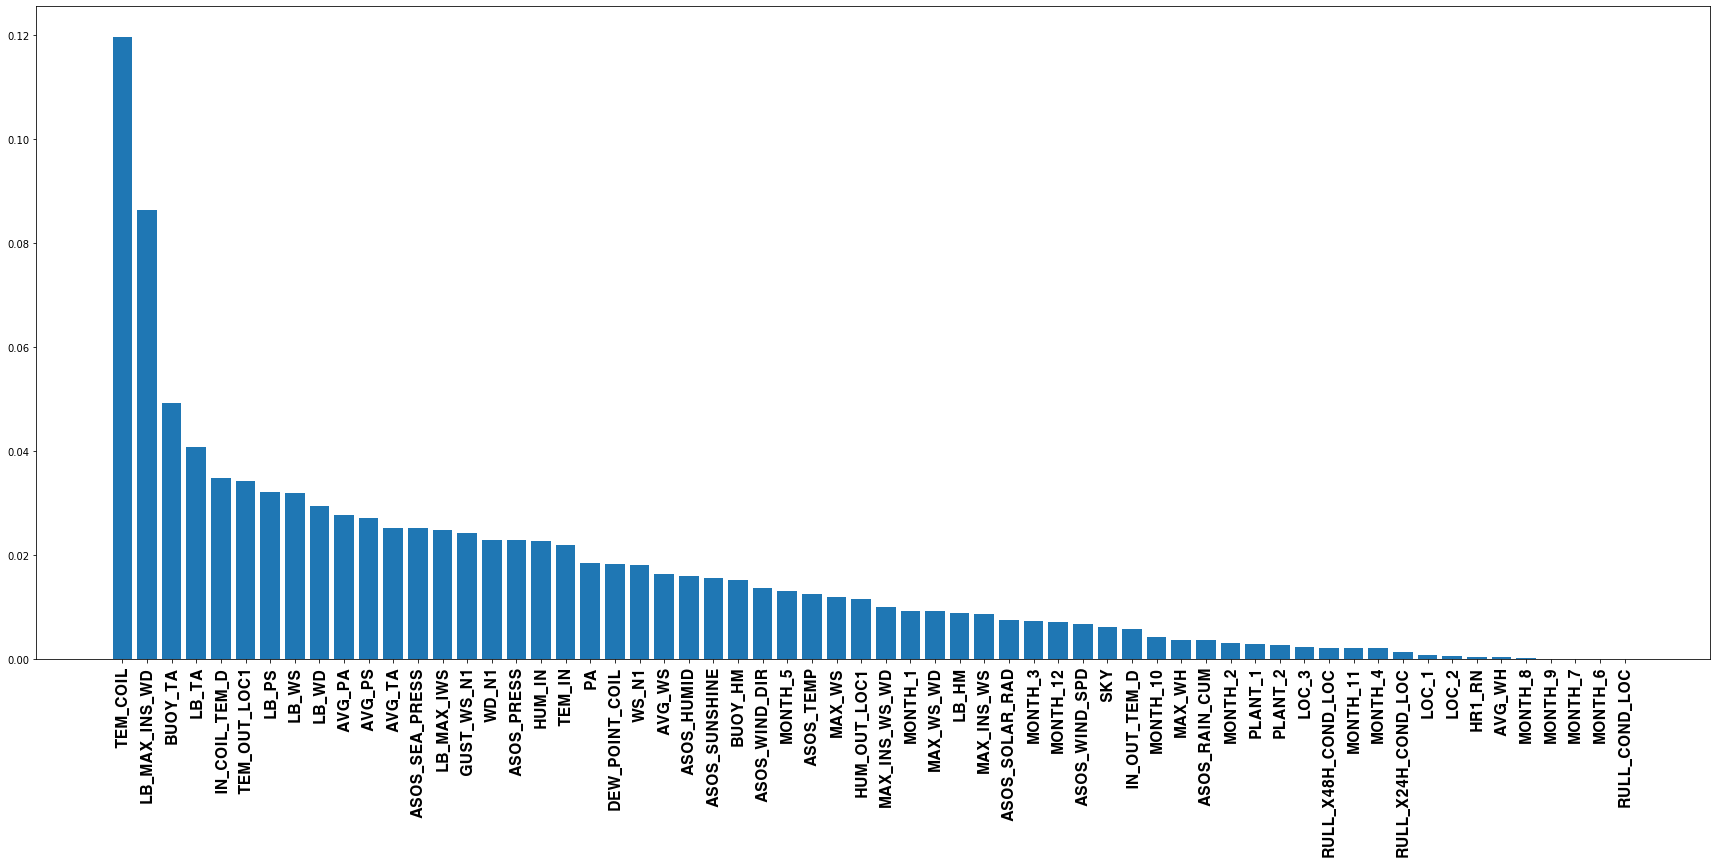

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under48_df.variable, rf_clf_under48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 검증값 만들기

In [107]:
validation = etl.makeValiation(test_data, rf_clf_under24, rf_clf_under48, test_X)
validation

C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,10
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,10
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,10,2019-04-03 11:00:00,0,10
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,10,2019-04-03 13:30:00,0,30
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,10,2020-03-31 03:00:00,0,20
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,30
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,10,2020-03-31 07:00:00,0,30
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,10


In [108]:
etl.findCondRow(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
87,2019-04-09 05:30:00,1,3,2019-04-10 05:30:00,1,70,2019-04-11 05:30:00,0,0
1975,2019-11-16 11:30:00,1,3,2019-11-17 11:30:00,1,60,2019-11-18 11:30:00,0,40
1976,2019-11-16 14:00:00,1,2,2019-11-17 14:00:00,1,80,2019-11-18 14:00:00,0,30
2014,2019-11-17 03:30:00,1,2,2019-11-18 03:30:00,1,60,2019-11-19 03:30:00,0,30
2015,2019-11-17 03:30:00,1,3,2019-11-18 03:30:00,1,70,2019-11-19 03:30:00,0,30
...,...,...,...,...,...,...,...,...,...
3419,2020-03-18 16:30:00,2,2,2020-03-19 16:30:00,1,60,2020-03-20 16:30:00,0,30
3420,2020-03-18 17:30:00,1,2,2020-03-19 17:30:00,1,60,2020-03-20 17:30:00,0,20
3490,2020-03-25 17:30:00,1,2,2020-03-26 17:30:00,1,60,2020-03-27 17:30:00,0,20
3497,2020-03-26 02:00:00,2,1,2020-03-27 02:00:00,1,60,2020-03-28 02:00:00,0,30


In [109]:
etl.findCondRow(validation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
26,2019-04-03 11:30:00,1,2,2019-04-04 11:30:00,0,20,2019-04-05 11:30:00,1,60
281,2019-05-01 02:30:00,1,1,2019-05-02 02:30:00,0,0,2019-05-03 02:30:00,1,70
396,2019-05-12 17:30:00,1,3,2019-05-13 17:30:00,0,30,2019-05-14 17:30:00,1,60
431,2019-05-16 06:00:00,1,2,2019-05-17 06:00:00,0,10,2019-05-18 06:00:00,1,70
1952,2019-11-15 23:00:00,1,3,2019-11-16 23:00:00,0,20,2019-11-17 23:00:00,1,60
...,...,...,...,...,...,...,...,...,...
3199,2020-02-23 18:30:00,2,2,2020-02-24 18:30:00,0,0,2020-02-25 18:30:00,1,70
3201,2020-02-23 23:30:00,1,3,2020-02-24 23:30:00,0,20,2020-02-25 23:30:00,1,60
3206,2020-02-24 09:30:00,1,1,2020-02-25 09:30:00,1,70,2020-02-26 09:30:00,1,60
3316,2020-03-07 15:00:00,2,2,2020-03-08 15:00:00,0,20,2020-03-09 15:00:00,1,60


# LightGBM
## 24 시간 결로 예측

### UnderSampling

In [110]:
from lightgbm import LGBMClassifier
lgbm_clf_under24 = LGBMClassifier(n_estimators=100, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under24.fit(X_undersampled24, y_undersampled24, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled24, y_undersampled24), (X_val, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_clf_under24.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	training's auc: 0.969531	training's binary_logloss: 0.62413	valid_1's auc: 0.953058	valid_1's binary_logloss: 0.626683
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.97483	training's binary_logloss: 0.566685	valid_1's auc: 0.962475	valid_1's binary_logloss: 0.571554
[3]	training's auc: 0.976907	training's binary_logloss: 0.518388	valid_1's auc: 0.965477	valid_1's binary_logloss: 0.525961
[4]	training's auc: 0.977166	training's binary_logloss: 0.477516	valid_1's auc: 0.965301	valid_1's binary_logloss: 0.487371
[5]	training's auc: 0.978201	training's binary_logloss: 0.443032	valid_1's auc: 0.966843	valid_1's binary_logloss: 0.455136
[6]	training's auc: 0.979967	training's binary_logloss: 0.41139	valid_1's auc: 0.968489	valid_1's binary_logloss: 0.425909
[7]	training's auc: 0.98135	training's binary_logloss: 0.384511	valid_1's auc: 0.970469	valid_1's binary_logloss: 0.400892
[8]	training's auc: 0.982174	training's binary_logloss: 0.360959	valid_1's

[85]	training's auc: 1	training's binary_logloss: 0.0125615	valid_1's auc: 0.995126	valid_1's binary_logloss: 0.101833
[86]	training's auc: 1	training's binary_logloss: 0.0121121	valid_1's auc: 0.99509	valid_1's binary_logloss: 0.101581
[87]	training's auc: 1	training's binary_logloss: 0.0116702	valid_1's auc: 0.995116	valid_1's binary_logloss: 0.101491
[88]	training's auc: 1	training's binary_logloss: 0.0112395	valid_1's auc: 0.995111	valid_1's binary_logloss: 0.101429
[89]	training's auc: 1	training's binary_logloss: 0.0107195	valid_1's auc: 0.995173	valid_1's binary_logloss: 0.100765
[90]	training's auc: 1	training's binary_logloss: 0.0101955	valid_1's auc: 0.995243	valid_1's binary_logloss: 0.100624
[91]	training's auc: 1	training's binary_logloss: 0.00982923	valid_1's auc: 0.99531	valid_1's binary_logloss: 0.100795
[92]	training's auc: 1	training's binary_logloss: 0.00946186	valid_1's auc: 0.995349	valid_1's binary_logloss: 0.100727
[93]	training's auc: 1	training's binary_logloss

[164]	training's auc: 1	training's binary_logloss: 0.000650106	valid_1's auc: 0.996299	valid_1's binary_logloss: 0.108758
[165]	training's auc: 1	training's binary_logloss: 0.000626128	valid_1's auc: 0.996341	valid_1's binary_logloss: 0.108952
[166]	training's auc: 1	training's binary_logloss: 0.000603471	valid_1's auc: 0.996342	valid_1's binary_logloss: 0.109149
[167]	training's auc: 1	training's binary_logloss: 0.000583349	valid_1's auc: 0.99631	valid_1's binary_logloss: 0.109469
[168]	training's auc: 1	training's binary_logloss: 0.000560237	valid_1's auc: 0.996316	valid_1's binary_logloss: 0.109545
[169]	training's auc: 1	training's binary_logloss: 0.00053825	valid_1's auc: 0.996303	valid_1's binary_logloss: 0.109928
[170]	training's auc: 1	training's binary_logloss: 0.00051759	valid_1's auc: 0.996318	valid_1's binary_logloss: 0.110128
[171]	training's auc: 1	training's binary_logloss: 0.000499334	valid_1's auc: 0.996331	valid_1's binary_logloss: 0.111043
[172]	training's auc: 1	tra

In [111]:
y_pred_under24 = lgbm_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.13      0.98      0.23       594

    accuracy                           0.96    104796
   macro avg       0.57      0.97      0.61    104796
weighted avg       0.99      0.96      0.98    104796



### 변수 중요도

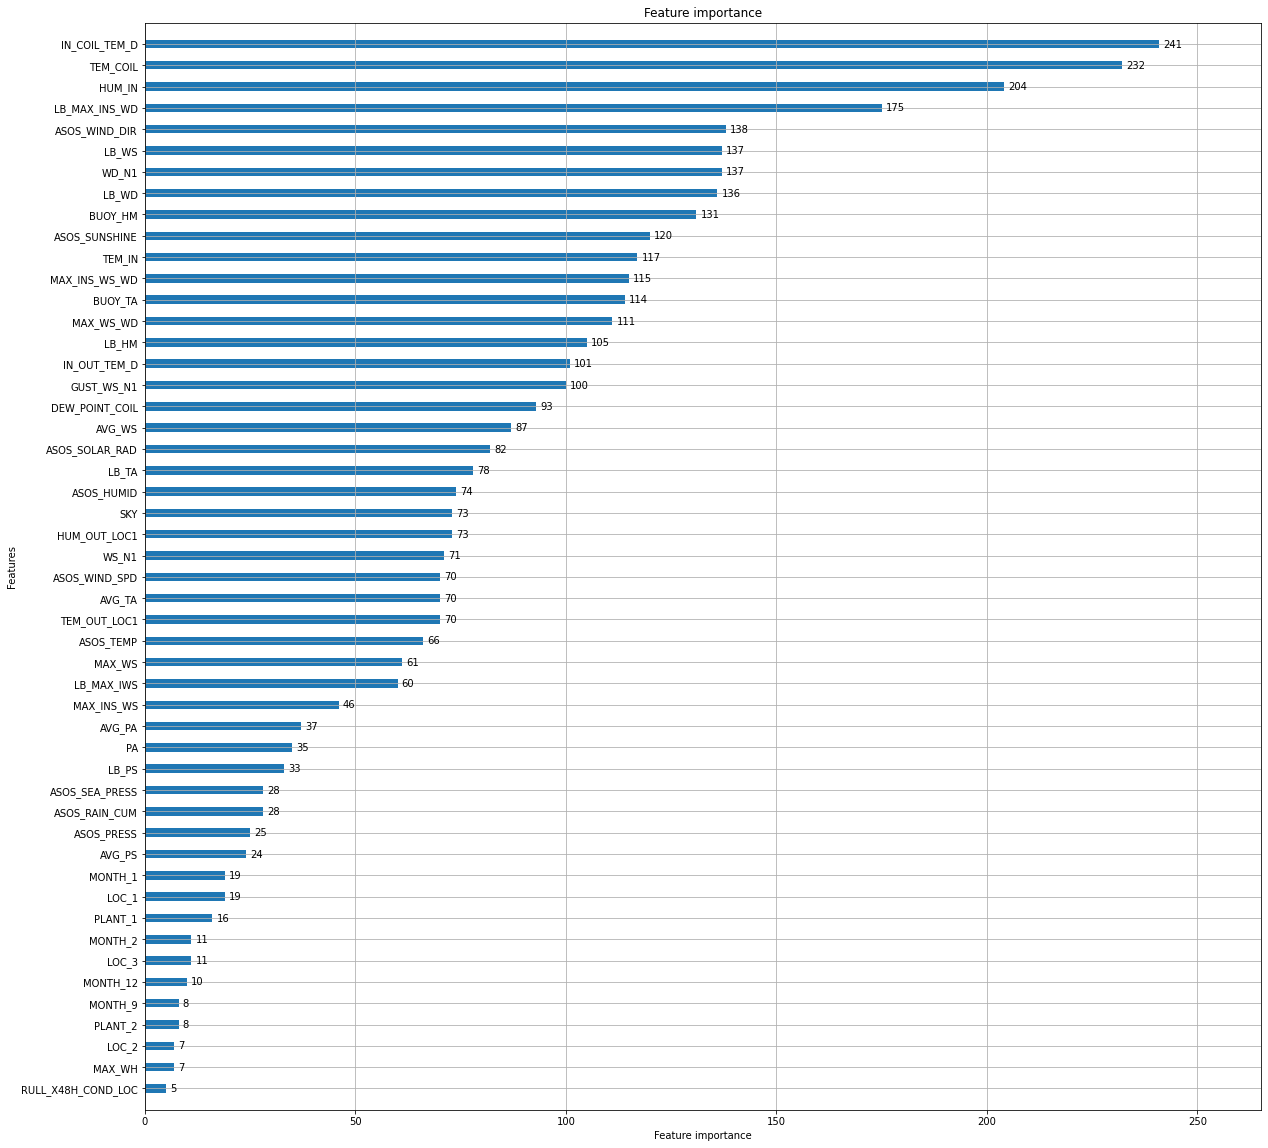

In [112]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_clf_under24, ax=ax,  max_num_features=50,height=0.4)

In [113]:
lgbm_model24_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_clf_under24.feature_importances_], columns=['variable', 'importance'])
lgbm_model24_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model24_df.tail(20)

,variable,importance
49,LOC_3,11
51,MONTH_2,11
61,MONTH_12,10
46,PLANT_2,8
58,MONTH_9,8
48,LOC_2,7
23,MAX_WH,7
2,RULL_X48H_COND_LOC,5
54,MONTH_5,3
1,RULL_X24H_COND_LOC,2


## 48 시간 결로 예측

### UnderSampling

In [174]:
from lightgbm import LGBMClassifier
lgbm_clf_under48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_clf_under48.fit(X_undersampled48, y_undersampled48, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_undersampled48, y_undersampled48), (X_val, y_val48)])

lgbm_roc_score = roc_auc_score(y_val48, lgbm_clf_under48.predict_proba(X_val)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	training's auc: 0.953544	training's binary_logloss: 0.631005	valid_1's auc: 0.939181	valid_1's binary_logloss: 0.633476
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.96922	training's binary_logloss: 0.576612	valid_1's auc: 0.95828	valid_1's binary_logloss: 0.58096
[3]	training's auc: 0.96958	training's binary_logloss: 0.533348	valid_1's auc: 0.956005	valid_1's binary_logloss: 0.541261
[4]	training's auc: 0.972534	training's binary_logloss: 0.494823	valid_1's auc: 0.959884	valid_1's binary_logloss: 0.504181
[5]	training's auc: 0.974319	training's binary_logloss: 0.461831	valid_1's auc: 0.961854	valid_1's binary_logloss: 0.473443
[6]	training's auc: 0.977589	training's binary_logloss: 0.430291	valid_1's auc: 0.965514	valid_1's binary_logloss: 0.443309
[7]	training's auc: 0.982174	training's binary_logloss: 0.401955	valid_1's auc: 0.970413	valid_1's binary_logloss: 0.418711
[8]	training's auc: 0.983053	training's binary_logloss: 0.376882	valid_1's

[69]	training's auc: 1	training's binary_logloss: 0.0296259	valid_1's auc: 0.993256	valid_1's binary_logloss: 0.111603
[70]	training's auc: 1	training's binary_logloss: 0.0284547	valid_1's auc: 0.99338	valid_1's binary_logloss: 0.110322
[71]	training's auc: 1	training's binary_logloss: 0.0276518	valid_1's auc: 0.993425	valid_1's binary_logloss: 0.110204
[72]	training's auc: 1	training's binary_logloss: 0.0266621	valid_1's auc: 0.9935	valid_1's binary_logloss: 0.109739
[73]	training's auc: 1	training's binary_logloss: 0.0255989	valid_1's auc: 0.993626	valid_1's binary_logloss: 0.108631
[74]	training's auc: 1	training's binary_logloss: 0.0248214	valid_1's auc: 0.99357	valid_1's binary_logloss: 0.108836
[75]	training's auc: 1	training's binary_logloss: 0.0239134	valid_1's auc: 0.993594	valid_1's binary_logloss: 0.108125
[76]	training's auc: 1	training's binary_logloss: 0.0230954	valid_1's auc: 0.993598	valid_1's binary_logloss: 0.107985
[77]	training's auc: 1	training's binary_logloss: 0.

[157]	training's auc: 1	training's binary_logloss: 0.00137497	valid_1's auc: 0.995657	valid_1's binary_logloss: 0.102128
[158]	training's auc: 1	training's binary_logloss: 0.00132364	valid_1's auc: 0.995687	valid_1's binary_logloss: 0.102405
[159]	training's auc: 1	training's binary_logloss: 0.00128352	valid_1's auc: 0.995673	valid_1's binary_logloss: 0.102662
[160]	training's auc: 1	training's binary_logloss: 0.00124251	valid_1's auc: 0.995699	valid_1's binary_logloss: 0.10286
[161]	training's auc: 1	training's binary_logloss: 0.00120327	valid_1's auc: 0.995677	valid_1's binary_logloss: 0.102961
[162]	training's auc: 1	training's binary_logloss: 0.00116701	valid_1's auc: 0.995683	valid_1's binary_logloss: 0.103224
[163]	training's auc: 1	training's binary_logloss: 0.00112526	valid_1's auc: 0.995686	valid_1's binary_logloss: 0.103209
[164]	training's auc: 1	training's binary_logloss: 0.00108555	valid_1's auc: 0.995678	valid_1's binary_logloss: 0.103494
[165]	training's auc: 1	training'

In [175]:
y_pred_under48 = lgbm_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.14      0.99      0.25       594

    accuracy                           0.97    104796
   macro avg       0.57      0.98      0.61    104796
weighted avg       1.00      0.97      0.98    104796



### 변수 중요도

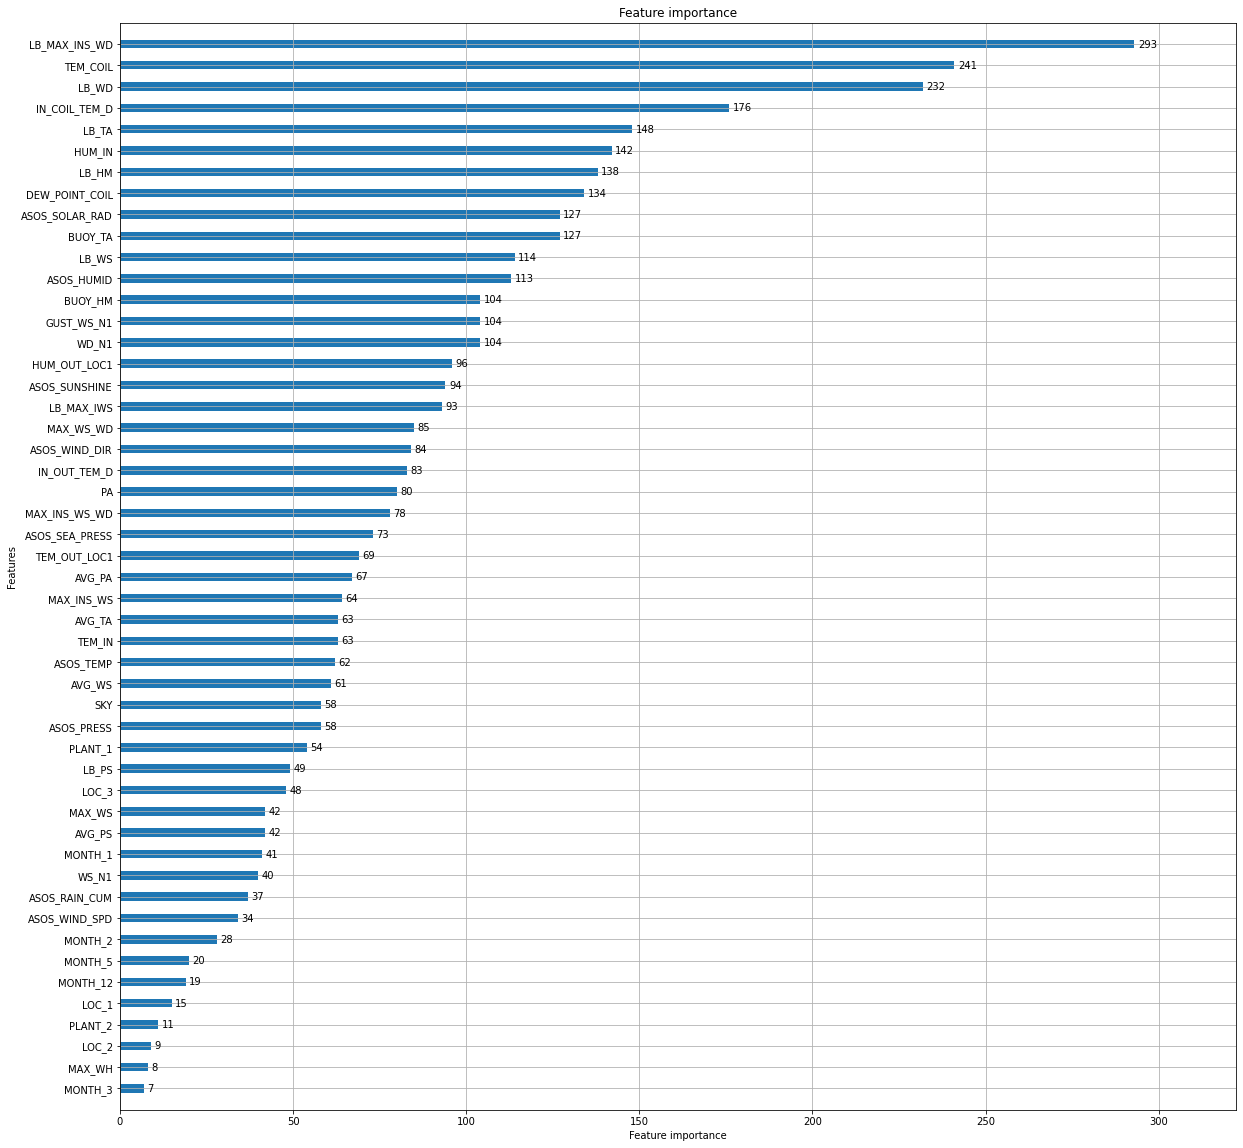

In [176]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_clf_under48, ax=ax,  max_num_features=50,height=0.4)

In [117]:
lgbm_model48_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_clf_under48.feature_importances_], columns=['variable', 'importance'])
lgbm_model48_df.sort_values(by="importance" ,ascending=False, inplace=True)
lgbm_model48_df.tail(20)

,variable,importance
51,MONTH_2,28
54,MONTH_5,20
61,MONTH_12,19
47,LOC_1,15
46,PLANT_2,11
48,LOC_2,9
23,MAX_WH,8
52,MONTH_3,7
2,RULL_X48H_COND_LOC,4
59,MONTH_10,4


## 검증값 만들기

In [118]:
lgValiation =etl.makeValiation(test_data,lgbm_clf_under24,lgbm_clf_under48, test_X)
lgValiation

C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,4
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,5
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,18
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [119]:
etl.findCondRow(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
150,2019-04-16 14:30:00,2,3,2019-04-17 14:30:00,1,59,2019-04-18 14:30:00,0,3
1936,2019-11-15 16:00:00,1,2,2019-11-16 16:00:00,1,51,2019-11-17 16:00:00,0,13
1937,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,52,2019-11-17 19:00:00,1,91
1938,2019-11-15 19:30:00,1,2,2019-11-16 19:30:00,1,56,2019-11-17 19:30:00,0,31
1949,2019-11-15 23:00:00,2,1,2019-11-16 23:00:00,1,60,2019-11-17 23:00:00,0,9
...,...,...,...,...,...,...,...,...,...
3208,2020-02-24 16:00:00,1,1,2020-02-25 16:00:00,1,84,2020-02-26 16:00:00,0,1
3209,2020-02-25 00:30:00,1,3,2020-02-26 00:30:00,1,88,2020-02-27 00:30:00,0,4
3281,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,92,2020-03-05 11:00:00,1,61
3334,2020-03-09 12:00:00,2,2,2020-03-10 12:00:00,1,61,2020-03-11 12:00:00,0,27


In [120]:
etl.findCondRow(lgValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
169,2019-04-19 00:30:00,1,3,2019-04-20 00:30:00,0,2,2019-04-21 00:30:00,1,69
1937,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,52,2019-11-17 19:00:00,1,91
2051,2019-11-22 03:30:00,1,3,2019-11-23 03:30:00,0,16,2019-11-24 03:30:00,1,69
2053,2019-11-22 07:00:00,2,1,2019-11-23 07:00:00,0,8,2019-11-24 07:00:00,1,77
2072,2019-11-22 21:00:00,1,2,2019-11-23 21:00:00,1,97,2019-11-24 21:00:00,1,87
...,...,...,...,...,...,...,...,...,...
3285,2020-03-03 20:00:00,2,2,2020-03-04 20:00:00,0,0,2020-03-05 20:00:00,1,58
3288,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,2,2020-03-05 22:30:00,1,77
3289,2020-03-03 23:00:00,2,1,2020-03-04 23:00:00,0,0,2020-03-05 23:00:00,1,68
3419,2020-03-18 16:30:00,2,2,2020-03-19 16:30:00,0,12,2020-03-20 16:30:00,1,52


In [121]:
etl.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24 시간 결로 예측

In [122]:
from xgboost import XGBClassifier

xgb_clf_under24 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_clf_under24.fit(X_undersampled24, y_undersampled24,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)


C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0]	validation_0-logloss:0.62016
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.55948
[2]	validation_0-logloss:0.50863
[3]	validation_0-logloss:0.46527
[4]	validation_0-logloss:0.42769
[5]	validation_0-logloss:0.39512
[6]	validation_0-logloss:0.36680
[7]	validation_0-logloss:0.34222
[8]	validation_0-logloss:0.32076
[9]	validation_0-logloss:0.30138
[10]	validation_0-logloss:0.28424
[11]	validation_0-logloss:0.26940
[12]	validation_0-logloss:0.25621
[13]	validation_0-logloss:0.24359
[14]	validation_0-logloss:0.23267
[15]	validation_0-logloss:0.22344
[16]	validation_0-logloss:0.21486
[17]	validation_0-logloss:0.20681
[18]	validation_0-logloss:0.19916
[19]	validation_0-logloss:0.19241
[20]	validation_0-logloss:0.18615
[21]	validation_0-logloss:0.18060
[22]	validation_0-logloss:0.17638
[23]	validation_0-logloss:0.17204
[24]	validation_0-logloss:0.16708
[25]	validation_0-logloss:0.16245
[26]	validation_0-logloss:0.15954
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [123]:
y_pred_under24 = xgb_clf_under24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.12      0.98      0.21       594

    accuracy                           0.96    104796
   macro avg       0.56      0.97      0.59    104796
weighted avg       0.99      0.96      0.97    104796



### 변수 중요도

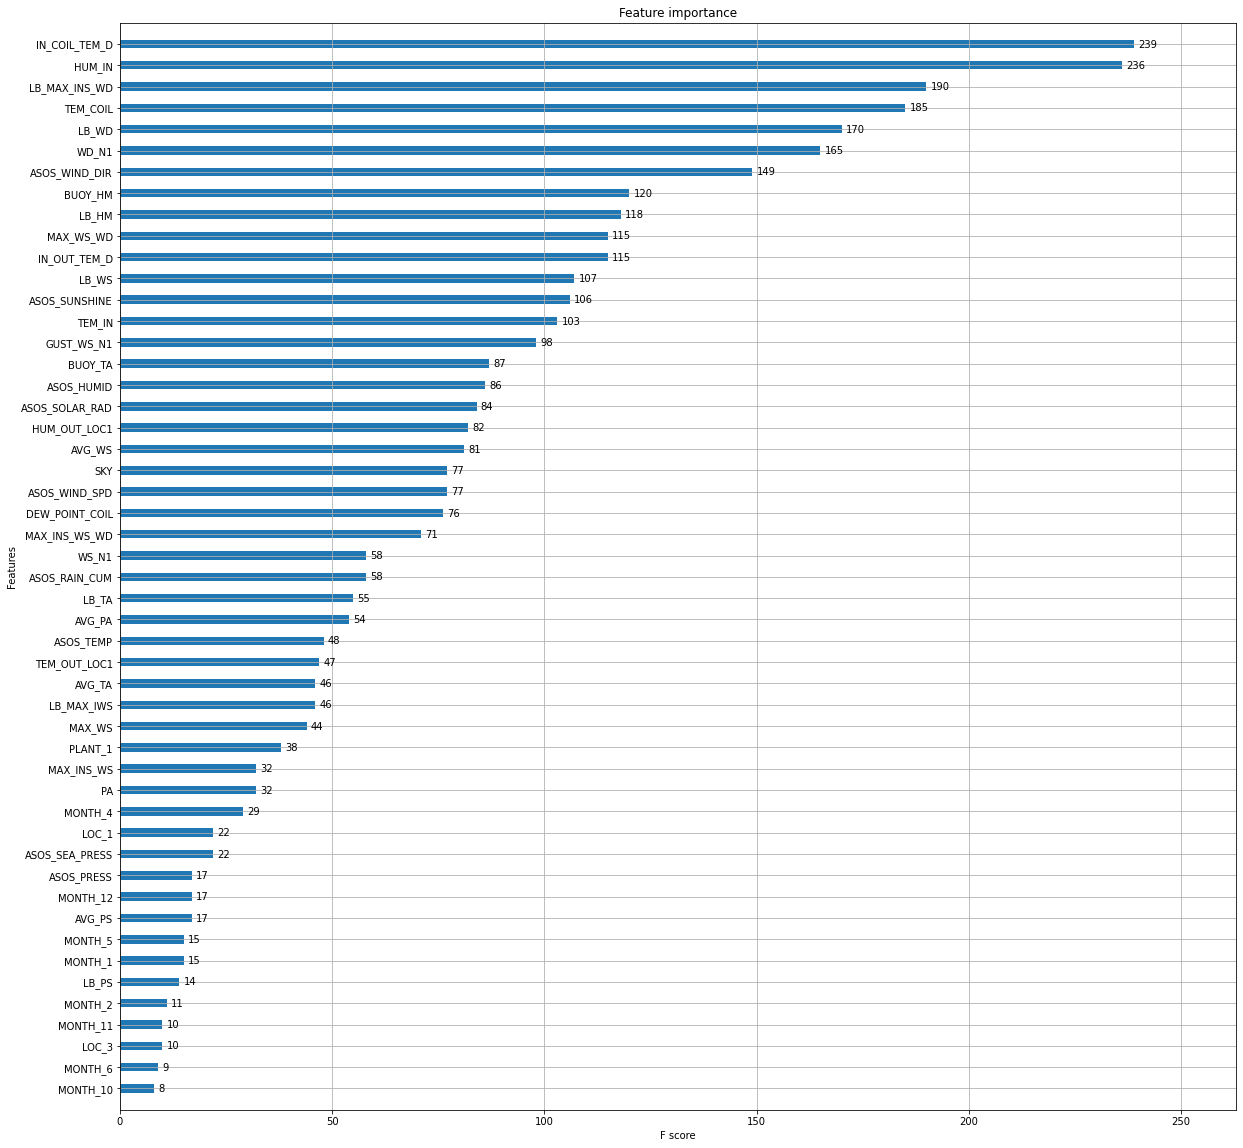

In [124]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(xgb_clf_under24, ax=ax,  max_num_features=50,height=0.4)

In [125]:
xgb_clf_under24_df = pd.DataFrame(data=np.c_[test_X.columns.values, xgb_clf_under24.feature_importances_], columns=['variable', 'importance'])
xgb_clf_under24_df.sort_values(by="importance" ,ascending=False, inplace=True)
xgb_clf_under24_df.tail(20)

,variable,importance
61,MONTH_12,0.00731661
39,ASOS_PRESS,0.0068942
59,MONTH_10,0.00638896
13,MAX_WS,0.00629222
23,MAX_WH,0.00609626
19,GUST_WS_N1,0.00597888
49,LOC_3,0.00585336
47,LOC_1,0.00567273
40,ASOS_SEA_PRESS,0.0054099
51,MONTH_2,0.00444956


## 48 시간 결로 예측

In [126]:
from xgboost import XGBClassifier

xgb_clf_under48 = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_clf_under48.fit(X_undersampled48, y_undersampled48,  early_stopping_rounds=100,eval_set=[(X_val, y_val24)], eval_metric="logloss",  verbose=True)


[0]	validation_0-logloss:0.62672
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.57474
[2]	validation_0-logloss:0.52956
[3]	validation_0-logloss:0.49102
[4]	validation_0-logloss:0.45248
[5]	validation_0-logloss:0.42226
[6]	validation_0-logloss:0.39598
[7]	validation_0-logloss:0.37138
[8]	validation_0-logloss:0.35063
[9]	validation_0-logloss:0.32888
[10]	validation_0-logloss:0.30974
[11]	validation_0-logloss:0.29301
[12]	validation_0-logloss:0.27709
[13]	validation_0-logloss:0.26374
[14]	validation_0-logloss:0.25290
[15]	validation_0-logloss:0.24053
[16]	validation_0-logloss:0.23158
[17]	validation_0-logloss:0.22358
[18]	validation_0-logloss:0.21393
[19]	validation_0-logloss:0.20637
[20]	validation_0-logloss:0.20008
[21]	validation_0-logloss:0.19358
[22]	validation_0-logloss:0.18693
[23]	validation_0-logloss:0.18161
[24]	validation_0-logloss:0.17731
[25]	validation_0-logloss:0.17213
[26]	validation_0-logloss:0.16872
[27]	validation_0-loglo

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [127]:
y_pred_under48 = xgb_clf_under48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.14      0.98      0.25       594

    accuracy                           0.97    104796
   macro avg       0.57      0.98      0.62    104796
weighted avg       1.00      0.97      0.98    104796



### 변수 중요도

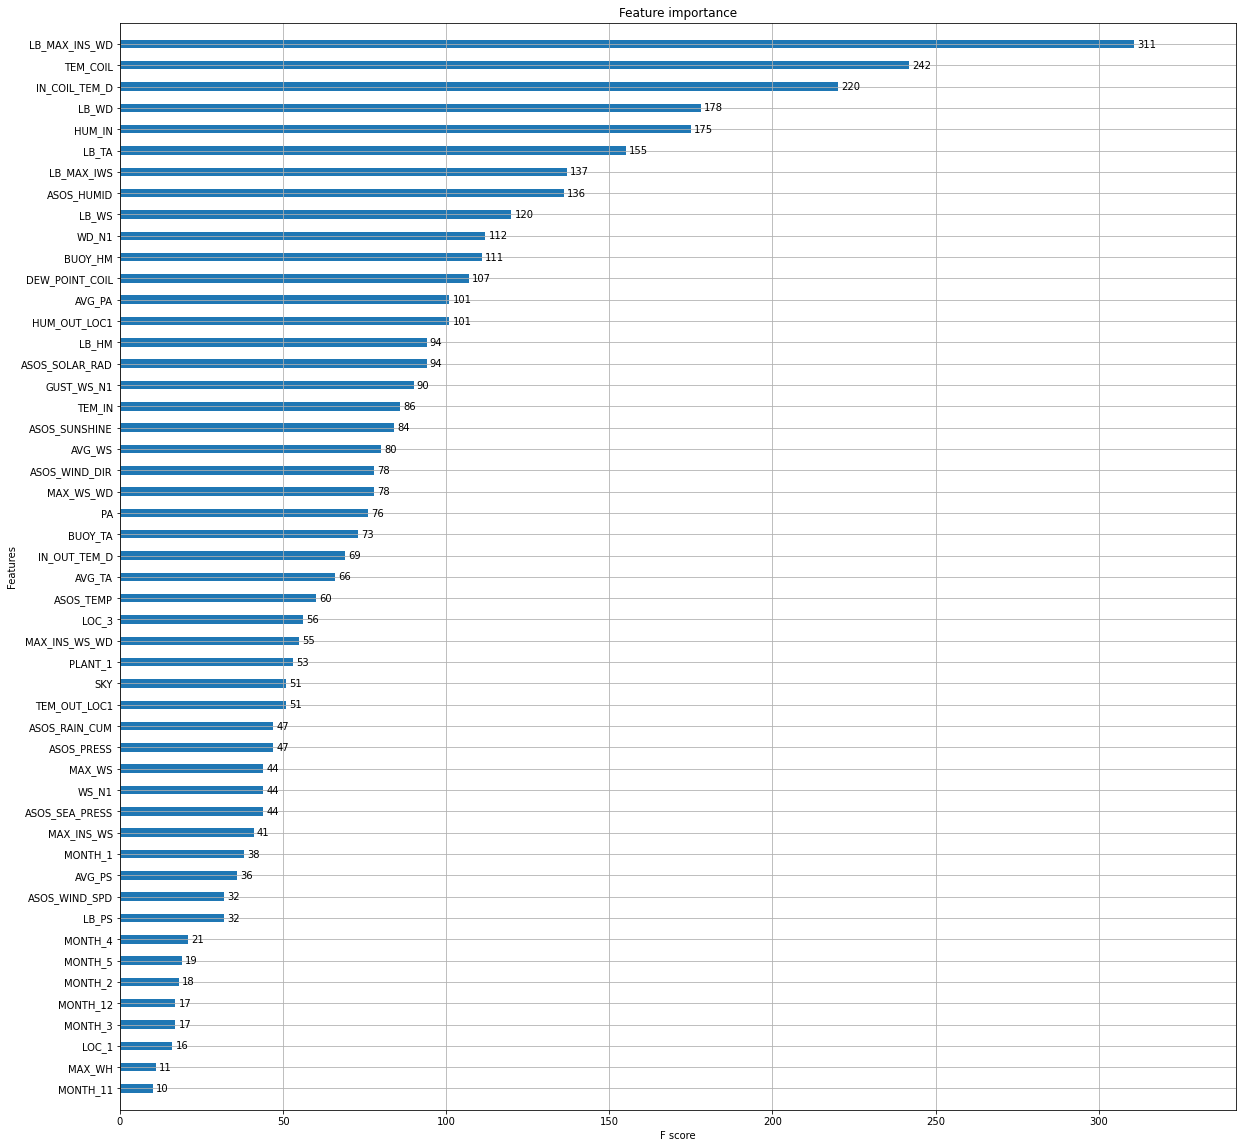

In [128]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(xgb_clf_under48, ax=ax,  max_num_features=50,height=0.4)

In [129]:
xgb_clf_under48_df = pd.DataFrame(data=np.c_[test_X.columns.values, xgb_clf_under48.feature_importances_], columns=['variable', 'importance'])
xgb_clf_under48_df.sort_values(by="importance" ,ascending=False, inplace=True)
xgb_clf_under48_df.tail(20)

,variable,importance
47,LOC_1,0.00678782
42,ASOS_SOLAR_RAD,0.00656545
18,WS_N1,0.0060102
33,IN_OUT_TEM_D,0.00588872
35,ASOS_RAIN_CUM,0.00587422
13,MAX_WS,0.00579512
10,HR1_RN,0.00550333
21,BUOY_HM,0.00535783
23,MAX_WH,0.0050515
1,RULL_X24H_COND_LOC,0.00474579


## 검증 값 만들기

In [130]:
xgValiation= etl.makeValiation(test_data, xgb_clf_under24, xgb_clf_under48, test_X)
xgValiation

C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,2
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,15
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,16
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,1,55
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,4,2020-03-31 11:30:00,0,0


In [131]:
etl.findCondRow(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
58,2019-04-06 18:00:00,1,3,2019-04-07 18:00:00,1,52,2019-04-08 18:00:00,0,6
1724,2019-10-10 15:30:00,1,3,2019-10-11 15:30:00,1,54,2019-10-12 15:30:00,0,21
1936,2019-11-15 16:00:00,1,2,2019-11-16 16:00:00,1,73,2019-11-17 16:00:00,0,48
1937,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,82,2019-11-17 19:00:00,1,54
1938,2019-11-15 19:30:00,1,2,2019-11-16 19:30:00,1,72,2019-11-17 19:30:00,0,28
...,...,...,...,...,...,...,...,...,...
3312,2020-03-07 10:30:00,2,1,2020-03-08 10:30:00,1,50,2020-03-09 10:30:00,0,4
3324,2020-03-08 11:00:00,2,1,2020-03-09 11:00:00,1,52,2020-03-10 11:00:00,0,3
3334,2020-03-09 12:00:00,2,2,2020-03-10 12:00:00,1,92,2020-03-11 12:00:00,1,54
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,80,2020-03-28 15:00:00,1,51


In [132]:
etl.findCondRow(xgValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,1,55
190,2019-04-21 05:30:00,1,3,2019-04-22 05:30:00,0,0,2019-04-23 05:30:00,1,52
367,2019-05-09 15:30:00,2,2,2019-05-10 15:30:00,0,9,2019-05-11 15:30:00,1,61
403,2019-05-13 09:00:00,2,1,2019-05-14 09:00:00,0,2,2019-05-15 09:00:00,1,52
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,0,3,2019-05-16 09:30:00,1,56
...,...,...,...,...,...,...,...,...,...
3334,2020-03-09 12:00:00,2,2,2020-03-10 12:00:00,1,92,2020-03-11 12:00:00,1,54
3419,2020-03-18 16:30:00,2,2,2020-03-19 16:30:00,0,27,2020-03-20 16:30:00,1,58
3420,2020-03-18 17:30:00,1,2,2020-03-19 17:30:00,0,28,2020-03-20 17:30:00,1,50
3444,2020-03-21 21:30:00,1,3,2020-03-22 21:30:00,0,3,2020-03-23 21:30:00,1,76


In [133]:
etl.save_validation_csv(xgValiation,"xgboost")

# SVM

## 24시간 결로 예측

In [134]:
from sklearn.svm import SVC
svm_under24_clf = SVC(random_state=42,probability=True)
svm_under24_clf.fit(X_undersampled24, y_undersampled24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=42)

In [135]:
y_pred_under24 = svm_under24_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97    104202
         1.0       0.08      0.97      0.15       594

    accuracy                           0.94    104796
   macro avg       0.54      0.95      0.56    104796
weighted avg       0.99      0.94      0.96    104796



## 48시간 결로 예측

In [136]:
from sklearn.svm import SVC
svm_under48_clf = SVC(random_state=42,probability=True)
svm_under48_clf.fit(X_undersampled48, y_undersampled48)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=42)

In [137]:
y_pred_under48 = svm_under48_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96    104202
         1.0       0.06      0.95      0.12       594

    accuracy                           0.92    104796
   macro avg       0.53      0.94      0.54    104796
weighted avg       0.99      0.92      0.95    104796



In [138]:
svValiation= etl.makeValiation(test_data, svm_under24_clf, svm_under48_clf, test_X)
svValiation

C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,3
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,7
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,1
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,7
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,16
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,1
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,1
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,9
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,7


In [139]:
etl.findCondRow(svValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
57,2019-04-06 17:00:00,1,1,2019-04-07 17:00:00,1,39,2019-04-08 17:00:00,0,1
58,2019-04-06 18:00:00,1,3,2019-04-07 18:00:00,1,71,2019-04-08 18:00:00,0,2
59,2019-04-06 21:00:00,2,1,2019-04-07 21:00:00,1,39,2019-04-08 21:00:00,0,0
60,2019-04-06 22:30:00,1,3,2019-04-07 22:30:00,1,40,2019-04-08 22:30:00,0,2
62,2019-04-07 02:30:00,2,2,2019-04-08 02:30:00,1,37,2019-04-09 02:30:00,1,64
...,...,...,...,...,...,...,...,...,...
3491,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,40,2020-03-27 20:00:00,0,6
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,50,2020-03-28 15:00:00,1,90
3507,2020-03-26 16:30:00,1,2,2020-03-27 16:30:00,1,84,2020-03-28 16:30:00,1,87
3508,2020-03-26 19:00:00,2,2,2020-03-27 19:00:00,1,85,2020-03-28 19:00:00,1,62


In [140]:
etl.findCondRow(svValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
62,2019-04-07 02:30:00,2,2,2019-04-08 02:30:00,1,37,2019-04-09 02:30:00,1,64
63,2019-04-07 03:00:00,1,3,2019-04-08 03:00:00,0,7,2019-04-09 03:00:00,1,51
64,2019-04-07 03:00:00,2,1,2019-04-08 03:00:00,0,21,2019-04-09 03:00:00,1,64
211,2019-04-23 09:00:00,2,3,2019-04-24 09:00:00,0,5,2019-04-25 09:00:00,1,51
212,2019-04-23 09:30:00,2,2,2019-04-24 09:30:00,0,20,2019-04-25 09:30:00,1,59
...,...,...,...,...,...,...,...,...,...
3505,2020-03-26 07:30:00,2,3,2020-03-27 07:30:00,0,1,2020-03-28 07:30:00,1,42
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,50,2020-03-28 15:00:00,1,90
3507,2020-03-26 16:30:00,1,2,2020-03-27 16:30:00,1,84,2020-03-28 16:30:00,1,87
3508,2020-03-26 19:00:00,2,2,2020-03-27 19:00:00,1,85,2020-03-28 19:00:00,1,62


In [141]:
etl.save_validation_csv(svValiation,"svn")

# CatBoost

## 24 시간 결로 예측

In [158]:
from catboost import CatBoostClassifier
cat_under24_clf = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC',depth=5)
# train the model
cat_under24_clf.fit(X_undersampled24, y_undersampled24)

0:	total: 4.47ms	remaining: 4.46s
1:	total: 7.81ms	remaining: 3.9s
2:	total: 10.9ms	remaining: 3.63s
3:	total: 14.1ms	remaining: 3.5s
4:	total: 17.4ms	remaining: 3.46s
5:	total: 20.8ms	remaining: 3.45s
6:	total: 23.9ms	remaining: 3.4s
7:	total: 27.3ms	remaining: 3.38s
8:	total: 30.6ms	remaining: 3.37s
9:	total: 33.9ms	remaining: 3.35s
10:	total: 38.3ms	remaining: 3.44s
11:	total: 41.5ms	remaining: 3.42s
12:	total: 45.2ms	remaining: 3.43s
13:	total: 48.3ms	remaining: 3.4s
14:	total: 51.7ms	remaining: 3.39s
15:	total: 54.7ms	remaining: 3.36s
16:	total: 58.1ms	remaining: 3.36s
17:	total: 61.2ms	remaining: 3.34s
18:	total: 65.3ms	remaining: 3.37s
19:	total: 68.4ms	remaining: 3.35s
20:	total: 71.7ms	remaining: 3.34s
21:	total: 74.8ms	remaining: 3.32s
22:	total: 77.8ms	remaining: 3.31s
23:	total: 80.8ms	remaining: 3.29s
24:	total: 83.8ms	remaining: 3.27s
25:	total: 86.9ms	remaining: 3.26s
26:	total: 90ms	remaining: 3.24s
27:	total: 93.1ms	remaining: 3.23s
28:	total: 96.1ms	remaining: 3.22s
2

282:	total: 898ms	remaining: 2.27s
283:	total: 901ms	remaining: 2.27s
284:	total: 911ms	remaining: 2.28s
285:	total: 914ms	remaining: 2.28s
286:	total: 917ms	remaining: 2.28s
287:	total: 920ms	remaining: 2.27s
288:	total: 923ms	remaining: 2.27s
289:	total: 926ms	remaining: 2.27s
290:	total: 929ms	remaining: 2.26s
291:	total: 932ms	remaining: 2.26s
292:	total: 935ms	remaining: 2.25s
293:	total: 938ms	remaining: 2.25s
294:	total: 940ms	remaining: 2.25s
295:	total: 943ms	remaining: 2.24s
296:	total: 946ms	remaining: 2.24s
297:	total: 949ms	remaining: 2.24s
298:	total: 952ms	remaining: 2.23s
299:	total: 955ms	remaining: 2.23s
300:	total: 958ms	remaining: 2.22s
301:	total: 961ms	remaining: 2.22s
302:	total: 964ms	remaining: 2.22s
303:	total: 967ms	remaining: 2.21s
304:	total: 970ms	remaining: 2.21s
305:	total: 973ms	remaining: 2.21s
306:	total: 976ms	remaining: 2.2s
307:	total: 978ms	remaining: 2.2s
308:	total: 981ms	remaining: 2.19s
309:	total: 984ms	remaining: 2.19s
310:	total: 987ms	rema

557:	total: 1.77s	remaining: 1.4s
558:	total: 1.78s	remaining: 1.4s
559:	total: 1.78s	remaining: 1.4s
560:	total: 1.78s	remaining: 1.39s
561:	total: 1.78s	remaining: 1.39s
562:	total: 1.79s	remaining: 1.39s
563:	total: 1.79s	remaining: 1.39s
564:	total: 1.79s	remaining: 1.38s
565:	total: 1.8s	remaining: 1.38s
566:	total: 1.8s	remaining: 1.38s
567:	total: 1.8s	remaining: 1.37s
568:	total: 1.81s	remaining: 1.37s
569:	total: 1.81s	remaining: 1.36s
570:	total: 1.81s	remaining: 1.36s
571:	total: 1.81s	remaining: 1.36s
572:	total: 1.82s	remaining: 1.35s
573:	total: 1.82s	remaining: 1.35s
574:	total: 1.82s	remaining: 1.35s
575:	total: 1.83s	remaining: 1.34s
576:	total: 1.83s	remaining: 1.34s
577:	total: 1.83s	remaining: 1.34s
578:	total: 1.84s	remaining: 1.33s
579:	total: 1.84s	remaining: 1.33s
580:	total: 1.84s	remaining: 1.33s
581:	total: 1.84s	remaining: 1.32s
582:	total: 1.85s	remaining: 1.32s
583:	total: 1.85s	remaining: 1.32s
584:	total: 1.85s	remaining: 1.31s
585:	total: 1.86s	remainin

794:	total: 2.48s	remaining: 641ms
795:	total: 2.49s	remaining: 638ms
796:	total: 2.49s	remaining: 635ms
797:	total: 2.49s	remaining: 632ms
798:	total: 2.5s	remaining: 628ms
799:	total: 2.5s	remaining: 625ms
800:	total: 2.5s	remaining: 622ms
801:	total: 2.51s	remaining: 619ms
802:	total: 2.51s	remaining: 616ms
803:	total: 2.51s	remaining: 613ms
804:	total: 2.52s	remaining: 609ms
805:	total: 2.52s	remaining: 606ms
806:	total: 2.52s	remaining: 603ms
807:	total: 2.52s	remaining: 600ms
808:	total: 2.53s	remaining: 597ms
809:	total: 2.53s	remaining: 594ms
810:	total: 2.53s	remaining: 590ms
811:	total: 2.54s	remaining: 587ms
812:	total: 2.54s	remaining: 584ms
813:	total: 2.54s	remaining: 581ms
814:	total: 2.54s	remaining: 578ms
815:	total: 2.55s	remaining: 575ms
816:	total: 2.55s	remaining: 571ms
817:	total: 2.55s	remaining: 568ms
818:	total: 2.56s	remaining: 565ms
819:	total: 2.56s	remaining: 562ms
820:	total: 2.56s	remaining: 559ms
821:	total: 2.56s	remaining: 556ms
822:	total: 2.57s	remai

In [159]:
y_pred_under24 = cat_under24_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred_under24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.14      0.98      0.24       594

    accuracy                           0.96    104796
   macro avg       0.57      0.97      0.61    104796
weighted avg       1.00      0.96      0.98    104796



In [160]:
rf_clf_under24_df = pd.DataFrame(data=np.c_[train_X.columns.values, cat_under24_clf.feature_importances_], columns=['variable', 'importance'])
rf_clf_under24_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under24_df.tail(20)

,variable,importance
45,PLANT_1,0.518486
61,MONTH_12,0.45404
59,MONTH_10,0.403381
46,PLANT_2,0.322744
54,MONTH_5,0.291362
15,MAX_INS_WS,0.244444
47,LOC_1,0.217683
52,MONTH_3,0.171542
49,LOC_3,0.105245
0,RULL_COND_LOC,0.0622885


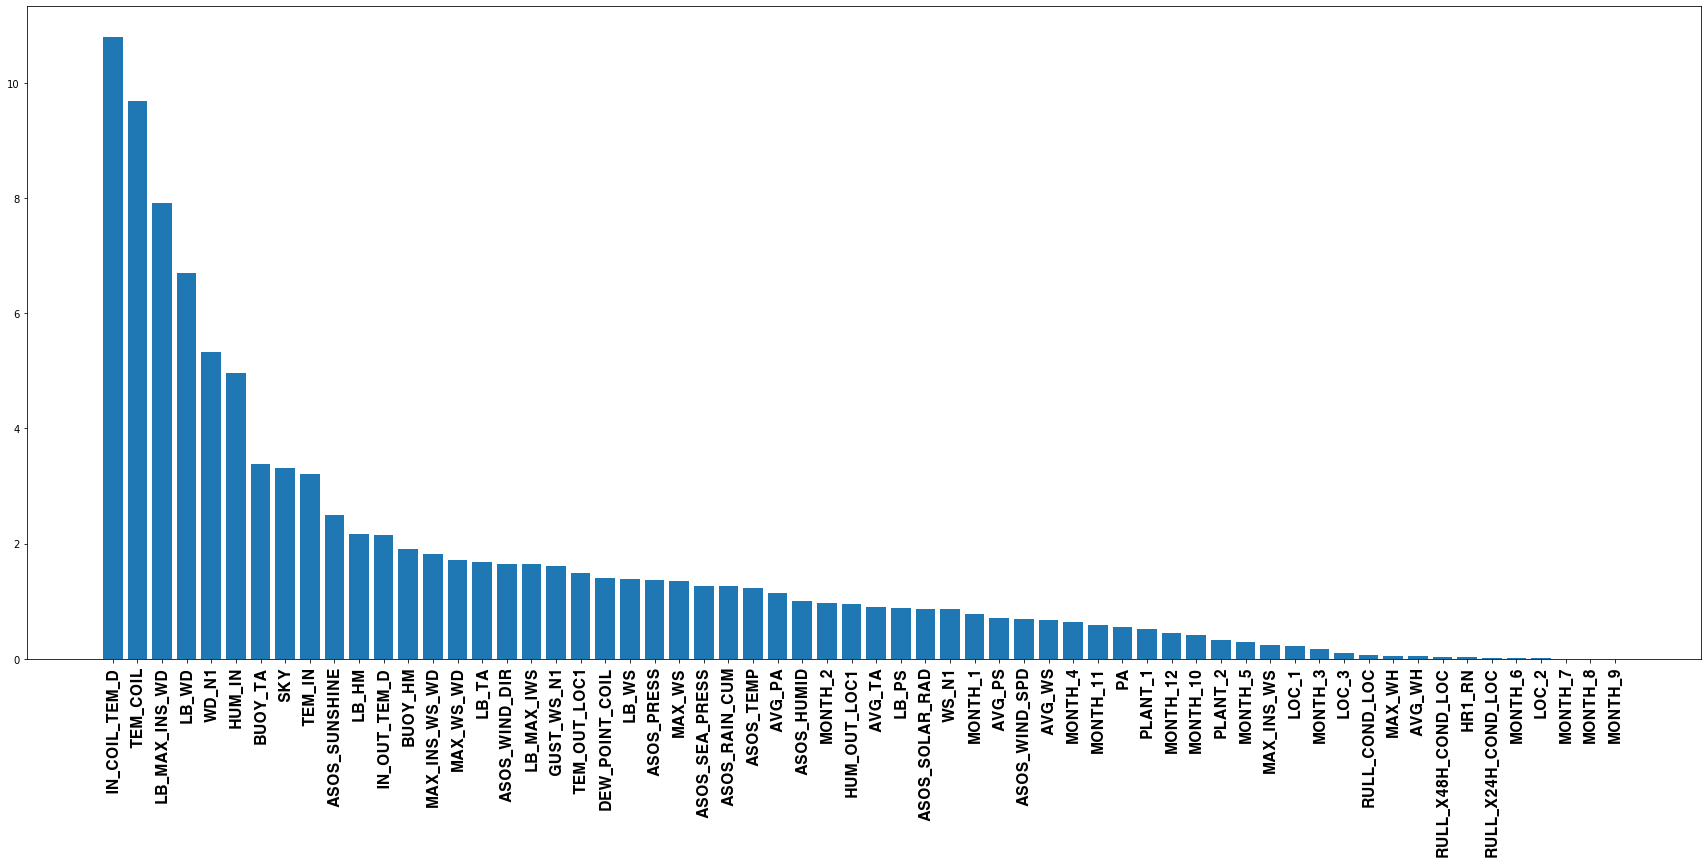

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

## 48 시간 결로 예측

In [162]:
from catboost import CatBoostClassifier
cat_under48_clf = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='AUC',depth=5)
# train the model
cat_under48_clf.fit(X_undersampled48, y_undersampled48)

0:	total: 4.94ms	remaining: 4.93s
1:	total: 8.54ms	remaining: 4.26s
2:	total: 12ms	remaining: 3.99s
3:	total: 15.4ms	remaining: 3.83s
4:	total: 18.5ms	remaining: 3.67s
5:	total: 21.6ms	remaining: 3.58s
6:	total: 24.6ms	remaining: 3.49s
7:	total: 27.5ms	remaining: 3.42s
8:	total: 31.8ms	remaining: 3.5s
9:	total: 35.7ms	remaining: 3.54s
10:	total: 39.6ms	remaining: 3.56s
11:	total: 42.7ms	remaining: 3.51s
12:	total: 45.5ms	remaining: 3.45s
13:	total: 48.6ms	remaining: 3.42s
14:	total: 52ms	remaining: 3.42s
15:	total: 55ms	remaining: 3.38s
16:	total: 57.9ms	remaining: 3.35s
17:	total: 60.8ms	remaining: 3.32s
18:	total: 63.6ms	remaining: 3.28s
19:	total: 66.5ms	remaining: 3.26s
20:	total: 69.5ms	remaining: 3.24s
21:	total: 72.4ms	remaining: 3.22s
22:	total: 75.3ms	remaining: 3.2s
23:	total: 78.1ms	remaining: 3.18s
24:	total: 81.1ms	remaining: 3.16s
25:	total: 84.1ms	remaining: 3.15s
26:	total: 87.2ms	remaining: 3.14s
27:	total: 90.1ms	remaining: 3.13s
28:	total: 93.1ms	remaining: 3.12s
29:

279:	total: 883ms	remaining: 2.27s
280:	total: 887ms	remaining: 2.27s
281:	total: 890ms	remaining: 2.27s
282:	total: 893ms	remaining: 2.26s
283:	total: 896ms	remaining: 2.26s
284:	total: 899ms	remaining: 2.25s
285:	total: 902ms	remaining: 2.25s
286:	total: 905ms	remaining: 2.25s
287:	total: 908ms	remaining: 2.25s
288:	total: 911ms	remaining: 2.24s
289:	total: 914ms	remaining: 2.24s
290:	total: 917ms	remaining: 2.23s
291:	total: 920ms	remaining: 2.23s
292:	total: 923ms	remaining: 2.23s
293:	total: 926ms	remaining: 2.22s
294:	total: 930ms	remaining: 2.22s
295:	total: 933ms	remaining: 2.22s
296:	total: 936ms	remaining: 2.21s
297:	total: 939ms	remaining: 2.21s
298:	total: 942ms	remaining: 2.21s
299:	total: 945ms	remaining: 2.2s
300:	total: 948ms	remaining: 2.2s
301:	total: 950ms	remaining: 2.2s
302:	total: 953ms	remaining: 2.19s
303:	total: 956ms	remaining: 2.19s
304:	total: 959ms	remaining: 2.19s
305:	total: 962ms	remaining: 2.18s
306:	total: 965ms	remaining: 2.18s
307:	total: 968ms	remai

518:	total: 1.6s	remaining: 1.48s
519:	total: 1.6s	remaining: 1.48s
520:	total: 1.6s	remaining: 1.47s
521:	total: 1.61s	remaining: 1.47s
522:	total: 1.61s	remaining: 1.47s
523:	total: 1.61s	remaining: 1.47s
524:	total: 1.61s	remaining: 1.46s
525:	total: 1.62s	remaining: 1.46s
526:	total: 1.62s	remaining: 1.46s
527:	total: 1.62s	remaining: 1.45s
528:	total: 1.63s	remaining: 1.45s
529:	total: 1.63s	remaining: 1.45s
530:	total: 1.63s	remaining: 1.44s
531:	total: 1.64s	remaining: 1.44s
532:	total: 1.64s	remaining: 1.44s
533:	total: 1.64s	remaining: 1.43s
534:	total: 1.65s	remaining: 1.43s
535:	total: 1.65s	remaining: 1.43s
536:	total: 1.65s	remaining: 1.42s
537:	total: 1.65s	remaining: 1.42s
538:	total: 1.66s	remaining: 1.42s
539:	total: 1.66s	remaining: 1.41s
540:	total: 1.66s	remaining: 1.41s
541:	total: 1.67s	remaining: 1.41s
542:	total: 1.67s	remaining: 1.4s
543:	total: 1.67s	remaining: 1.4s
544:	total: 1.67s	remaining: 1.4s
545:	total: 1.68s	remaining: 1.4s
546:	total: 1.68s	remaining

805:	total: 2.47s	remaining: 596ms
806:	total: 2.48s	remaining: 593ms
807:	total: 2.48s	remaining: 589ms
808:	total: 2.48s	remaining: 586ms
809:	total: 2.49s	remaining: 583ms
810:	total: 2.49s	remaining: 580ms
811:	total: 2.49s	remaining: 577ms
812:	total: 2.5s	remaining: 574ms
813:	total: 2.5s	remaining: 571ms
814:	total: 2.5s	remaining: 568ms
815:	total: 2.5s	remaining: 565ms
816:	total: 2.51s	remaining: 562ms
817:	total: 2.51s	remaining: 559ms
818:	total: 2.51s	remaining: 556ms
819:	total: 2.52s	remaining: 552ms
820:	total: 2.52s	remaining: 549ms
821:	total: 2.52s	remaining: 546ms
822:	total: 2.52s	remaining: 543ms
823:	total: 2.53s	remaining: 540ms
824:	total: 2.53s	remaining: 537ms
825:	total: 2.53s	remaining: 534ms
826:	total: 2.54s	remaining: 531ms
827:	total: 2.54s	remaining: 528ms
828:	total: 2.54s	remaining: 525ms
829:	total: 2.55s	remaining: 522ms
830:	total: 2.55s	remaining: 518ms
831:	total: 2.55s	remaining: 515ms
832:	total: 2.56s	remaining: 512ms
833:	total: 2.56s	remain

In [163]:
y_pred_under48 = cat_under48_clf.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred_under48))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.13      0.99      0.24       594

    accuracy                           0.96    104796
   macro avg       0.57      0.98      0.61    104796
weighted avg       1.00      0.96      0.98    104796



In [164]:
rf_clf_under48_df = pd.DataFrame(data=np.c_[train_X.columns.values, cat_under48_clf.feature_importances_], columns=['variable', 'importance'])
rf_clf_under48_df.sort_values(by='importance', ascending=False, inplace=True)
rf_clf_under48_df.tail(20)

,variable,importance
35,ASOS_RAIN_CUM,0.638927
23,MAX_WH,0.634504
12,AVG_WS,0.598721
37,ASOS_WIND_DIR,0.4827
13,MAX_WS,0.474932
53,MONTH_4,0.442548
18,WS_N1,0.371938
38,ASOS_WIND_SPD,0.30703
15,MAX_INS_WS,0.254812
60,MONTH_11,0.246433


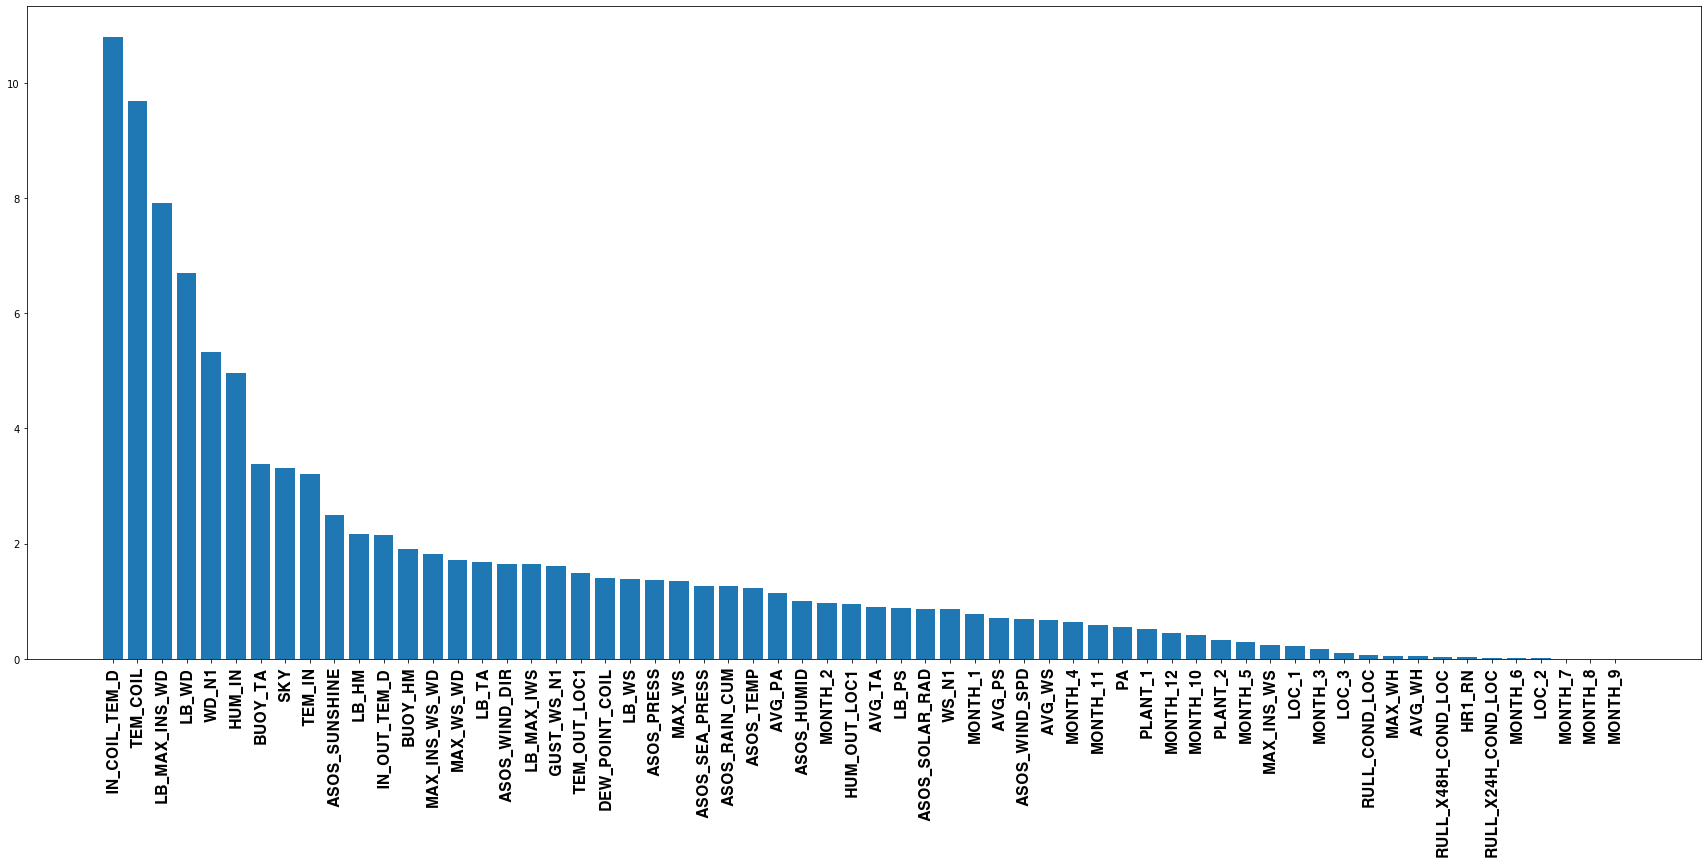

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(rf_clf_under24_df.variable, rf_clf_under24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [166]:
catValiation=etl.makeValiation(test_data,cat_under24_clf,cat_under48_clf,test_X)

C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [167]:
etl.findCondRow(catValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
148,2019-04-16 11:00:00,2,1,2019-04-17 11:00:00,1,64,2019-04-18 11:00:00,0,3
1937,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,69,2019-11-17 19:00:00,0,39
1975,2019-11-16 11:30:00,1,3,2019-11-17 11:30:00,1,88,2019-11-18 11:30:00,0,13
1976,2019-11-16 14:00:00,1,2,2019-11-17 14:00:00,1,87,2019-11-18 14:00:00,0,36
1978,2019-11-16 20:00:00,1,2,2019-11-17 20:00:00,1,52,2019-11-18 20:00:00,0,20
...,...,...,...,...,...,...,...,...,...
3334,2020-03-09 12:00:00,2,2,2020-03-10 12:00:00,1,51,2020-03-11 12:00:00,1,50
3491,2020-03-25 20:00:00,1,1,2020-03-26 20:00:00,1,52,2020-03-27 20:00:00,0,2
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,76,2020-03-28 15:00:00,0,30
3507,2020-03-26 16:30:00,1,2,2020-03-27 16:30:00,1,60,2020-03-28 16:30:00,0,43


In [168]:
etl.findCondRow(catValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
402,2019-05-13 07:00:00,1,3,2019-05-14 07:00:00,0,1,2019-05-15 07:00:00,1,54
403,2019-05-13 09:00:00,2,1,2019-05-14 09:00:00,0,7,2019-05-15 09:00:00,1,79
411,2019-05-14 09:30:00,1,3,2019-05-15 09:30:00,0,10,2019-05-16 09:30:00,1,78
2051,2019-11-22 03:30:00,1,3,2019-11-23 03:30:00,1,58,2019-11-24 03:30:00,1,63
2053,2019-11-22 07:00:00,2,1,2019-11-23 07:00:00,0,13,2019-11-24 07:00:00,1,69
...,...,...,...,...,...,...,...,...,...
3285,2020-03-03 20:00:00,2,2,2020-03-04 20:00:00,0,0,2020-03-05 20:00:00,1,66
3287,2020-03-03 22:00:00,2,1,2020-03-04 22:00:00,0,2,2020-03-05 22:00:00,1,63
3288,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,2,2020-03-05 22:30:00,1,77
3289,2020-03-03 23:00:00,2,1,2020-03-04 23:00:00,0,2,2020-03-05 23:00:00,1,72


In [169]:
etl.save_validation_csv(catValiation,"cat")

# Ensemble xgb, svn, lgb

In [211]:
from sklearn.ensemble import VotingClassifier
voting_model24 = VotingClassifier(estimators=[('xgb', xgb_clf_under24), ('svn', svm_under24_clf), ('lgb', lgbm_clf_under24)], voting='soft')
voting_model24.fit(X_undersampled24, y_undersampled24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster=None,
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=10, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            random_state=42, reg_alpha=0,
                                    

In [212]:
y_pred24 = voting_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.14      0.98      0.24       594

    accuracy                           0.96    104796
   macro avg       0.57      0.97      0.61    104796
weighted avg       0.99      0.96      0.98    104796



In [213]:
from sklearn.ensemble import VotingClassifier
voting_model48 = VotingClassifier(estimators=[('xgb', xgb_clf_under48), ('svn', svm_under48_clf), ('lgb', lgbm_clf_under48)],voting='soft')
voting_model48.fit(X_undersampled48, y_undersampled48)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster=None,
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=10, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1,
                                            random_state=42, reg_alpha=0,
                                    

In [214]:
y_pred48 = voting_model48.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.15      0.98      0.25       594

    accuracy                           0.97    104796
   macro avg       0.57      0.98      0.62    104796
weighted avg       1.00      0.97      0.98    104796



In [215]:
vtValiation = etl.makeValiation(test_data,voting_model24, voting_model48, test_X)

C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [216]:
etl.findCondRow(vtValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1937,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,64,2019-11-17 19:00:00,1,78
1938,2019-11-15 19:30:00,1,2,2019-11-16 19:30:00,1,55,2019-11-17 19:30:00,0,30
1950,2019-11-15 23:00:00,1,2,2019-11-16 23:00:00,1,64,2019-11-17 23:00:00,0,22
1954,2019-11-15 23:30:00,1,2,2019-11-16 23:30:00,1,54,2019-11-17 23:30:00,0,15
1975,2019-11-16 11:30:00,1,3,2019-11-17 11:30:00,1,69,2019-11-18 11:30:00,0,18
...,...,...,...,...,...,...,...,...,...
3209,2020-02-25 00:30:00,1,3,2020-02-26 00:30:00,1,89,2020-02-27 00:30:00,0,26
3281,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,81,2020-03-05 11:00:00,0,40
3334,2020-03-09 12:00:00,2,2,2020-03-10 12:00:00,1,66,2020-03-11 12:00:00,0,44
3506,2020-03-26 15:00:00,2,2,2020-03-27 15:00:00,1,73,2020-03-28 15:00:00,0,49


In [217]:
etl.findCondRow(vtValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1937,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,64,2019-11-17 19:00:00,1,78
1952,2019-11-15 23:00:00,1,3,2019-11-16 23:00:00,0,47,2019-11-17 23:00:00,1,52
2051,2019-11-22 03:30:00,1,3,2019-11-23 03:30:00,0,13,2019-11-24 03:30:00,1,51
2053,2019-11-22 07:00:00,2,1,2019-11-23 07:00:00,0,2,2019-11-24 07:00:00,1,50
2072,2019-11-22 21:00:00,1,2,2019-11-23 21:00:00,1,93,2019-11-24 21:00:00,1,72
...,...,...,...,...,...,...,...,...,...
3201,2020-02-23 23:30:00,1,3,2020-02-24 23:30:00,0,49,2020-02-25 23:30:00,1,88
3285,2020-03-03 20:00:00,2,2,2020-03-04 20:00:00,0,0,2020-03-05 20:00:00,1,57
3288,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,0,2020-03-05 22:30:00,1,88
3289,2020-03-03 23:00:00,2,1,2020-03-04 23:00:00,0,0,2020-03-05 23:00:00,1,72


In [218]:
etl.save_validation_csv(vtValiation,"vt")

# Ensemble rf, svn, lgb

In [219]:
from sklearn.ensemble import VotingClassifier
voting_model24 = VotingClassifier(estimators=[('rf', rf_clf_under24), ('svn', svm_under24_clf), ('lgb', lgbm_clf_under24)], voting='soft')
voting_model24.fit(X_undersampled24, y_undersampled24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svn', SVC(probability=True, random_state=42)),
                             ('lgb',
                              LGBMClassifier(boost_from_average=False,
                                             max_depth=128,
                                             min_child_samples=60,
                                             n_estimators=1000, num_leaves=64,
                                             random_state=42, subsample=0.8))],
                 voting='soft')

In [220]:
y_pred24 = voting_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    104202
         1.0       0.14      0.98      0.25       594

    accuracy                           0.97    104796
   macro avg       0.57      0.97      0.62    104796
weighted avg       1.00      0.97      0.98    104796



In [221]:
from sklearn.ensemble import VotingClassifier
voting_model48 = VotingClassifier(estimators=[('rf', rf_clf_under48), ('svn', svm_under48_clf), ('lgb', lgbm_clf_under48)], voting='soft')
voting_model48.fit(X_undersampled48, y_undersampled48)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svn', SVC(probability=True, random_state=42)),
                             ('lgb',
                              LGBMClassifier(boost_from_average=False,
                                             max_depth=128,
                                             min_child_samples=60,
                                             n_estimators=1000, num_leaves=64,
                                             random_state=42, subsample=0.8))],
                 voting='soft')

In [222]:
y_pred48 = voting_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    104202
         1.0       0.04      0.24      0.06       594

    accuracy                           0.96    104796
   macro avg       0.52      0.60      0.52    104796
weighted avg       0.99      0.96      0.97    104796



In [223]:
vtValiation = etl.makeValiation(test_data, voting_model24, voting_model48, test_X)

C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\BIg_data\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [224]:
etl.findCondRow(vtValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1937,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,50,2019-11-17 19:00:00,1,69
1975,2019-11-16 11:30:00,1,3,2019-11-17 11:30:00,1,80,2019-11-18 11:30:00,0,27
1976,2019-11-16 14:00:00,1,2,2019-11-17 14:00:00,1,90,2019-11-18 14:00:00,0,42
2005,2019-11-17 01:30:00,1,3,2019-11-18 01:30:00,1,53,2019-11-19 01:30:00,0,29
2015,2019-11-17 03:30:00,1,3,2019-11-18 03:30:00,1,69,2019-11-19 03:30:00,0,31
...,...,...,...,...,...,...,...,...,...
3210,2020-02-25 02:30:00,1,2,2020-02-26 02:30:00,1,62,2020-02-27 02:30:00,0,13
3254,2020-02-29 02:30:00,2,1,2020-03-01 02:30:00,1,52,2020-03-02 02:30:00,0,18
3281,2020-03-03 11:00:00,2,1,2020-03-04 11:00:00,1,82,2020-03-05 11:00:00,0,48
3334,2020-03-09 12:00:00,2,2,2020-03-10 12:00:00,1,52,2020-03-11 12:00:00,0,30


In [225]:
etl.findCondRow(vtValiation, 48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
1937,2019-11-15 19:00:00,1,2,2019-11-16 19:00:00,1,50,2019-11-17 19:00:00,1,69
1952,2019-11-15 23:00:00,1,3,2019-11-16 23:00:00,0,41,2019-11-17 23:00:00,1,57
2072,2019-11-22 21:00:00,1,2,2019-11-23 21:00:00,1,70,2019-11-24 21:00:00,1,72
2073,2019-11-23 00:30:00,2,2,2019-11-24 00:30:00,0,4,2019-11-25 00:30:00,1,64
2074,2019-11-23 04:30:00,2,1,2019-11-24 04:30:00,1,52,2019-11-25 04:30:00,1,72
...,...,...,...,...,...,...,...,...,...
3285,2020-03-03 20:00:00,2,2,2020-03-04 20:00:00,0,0,2020-03-05 20:00:00,1,57
3288,2020-03-03 22:30:00,1,3,2020-03-04 22:30:00,0,0,2020-03-05 22:30:00,1,74
3289,2020-03-03 23:00:00,2,1,2020-03-04 23:00:00,0,0,2020-03-05 23:00:00,1,63
3444,2020-03-21 21:30:00,1,3,2020-03-22 21:30:00,0,5,2020-03-23 21:30:00,1,74
